In [1]:
#----------------------------------------------------------------------------------------#
# Add diffusers path to sys path
import sys
import os
from dotenv import load_dotenv
import torch
from PIL import Image
from io import BytesIO
# Load the .env file
load_dotenv()
# Get Diffusers path from environment variable
diffusers_path = os.getenv('DIFFUSERS_PATH')
print(f"Diffusers path: {diffusers_path}")
if diffusers_path is None:
    raise ValueError("Please set DIFFUSERS_PATH environment variable to Diffusers path")
sys.path.append(diffusers_path+"/src")
print("Diffusers version:", __import__('diffusers').__version__)
#----------------------------------------------------------------------------------------#



from diffusers import StableDiffusionImg2ImgPipeline
models = [r'f:\sd_models\ghostmix_v2',
          r'f:\sd_models\aesteticmix',
          r'f:\sd_models\revAnimated_v122',]
device = "cuda"
    
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", safety_checker=None, torch_dtype=torch.float16)
pipe = pipe.to(device)
from diffusers import DDIMScheduler as Scheduler

scheduler = Scheduler.from_config(pipe.scheduler.config)
pipe.scheduler = scheduler

Diffusers path: /home/cilem/playground/diffusers


/home/cilem/anaconda3/envs/diff/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Diffusers version: 0.18.0.dev0


Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  4.48it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


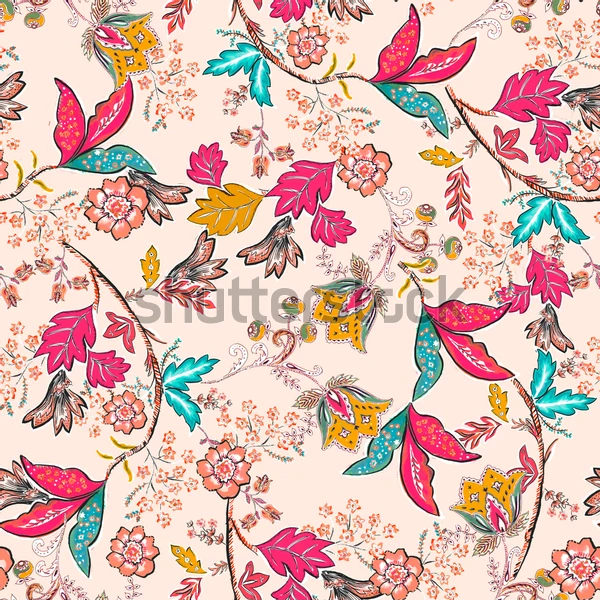

In [2]:
init_image = Image.open("input_image.png").convert("RGB")
display(init_image)

100%|██████████| 52/52 [02:41<00:00,  3.11s/it]


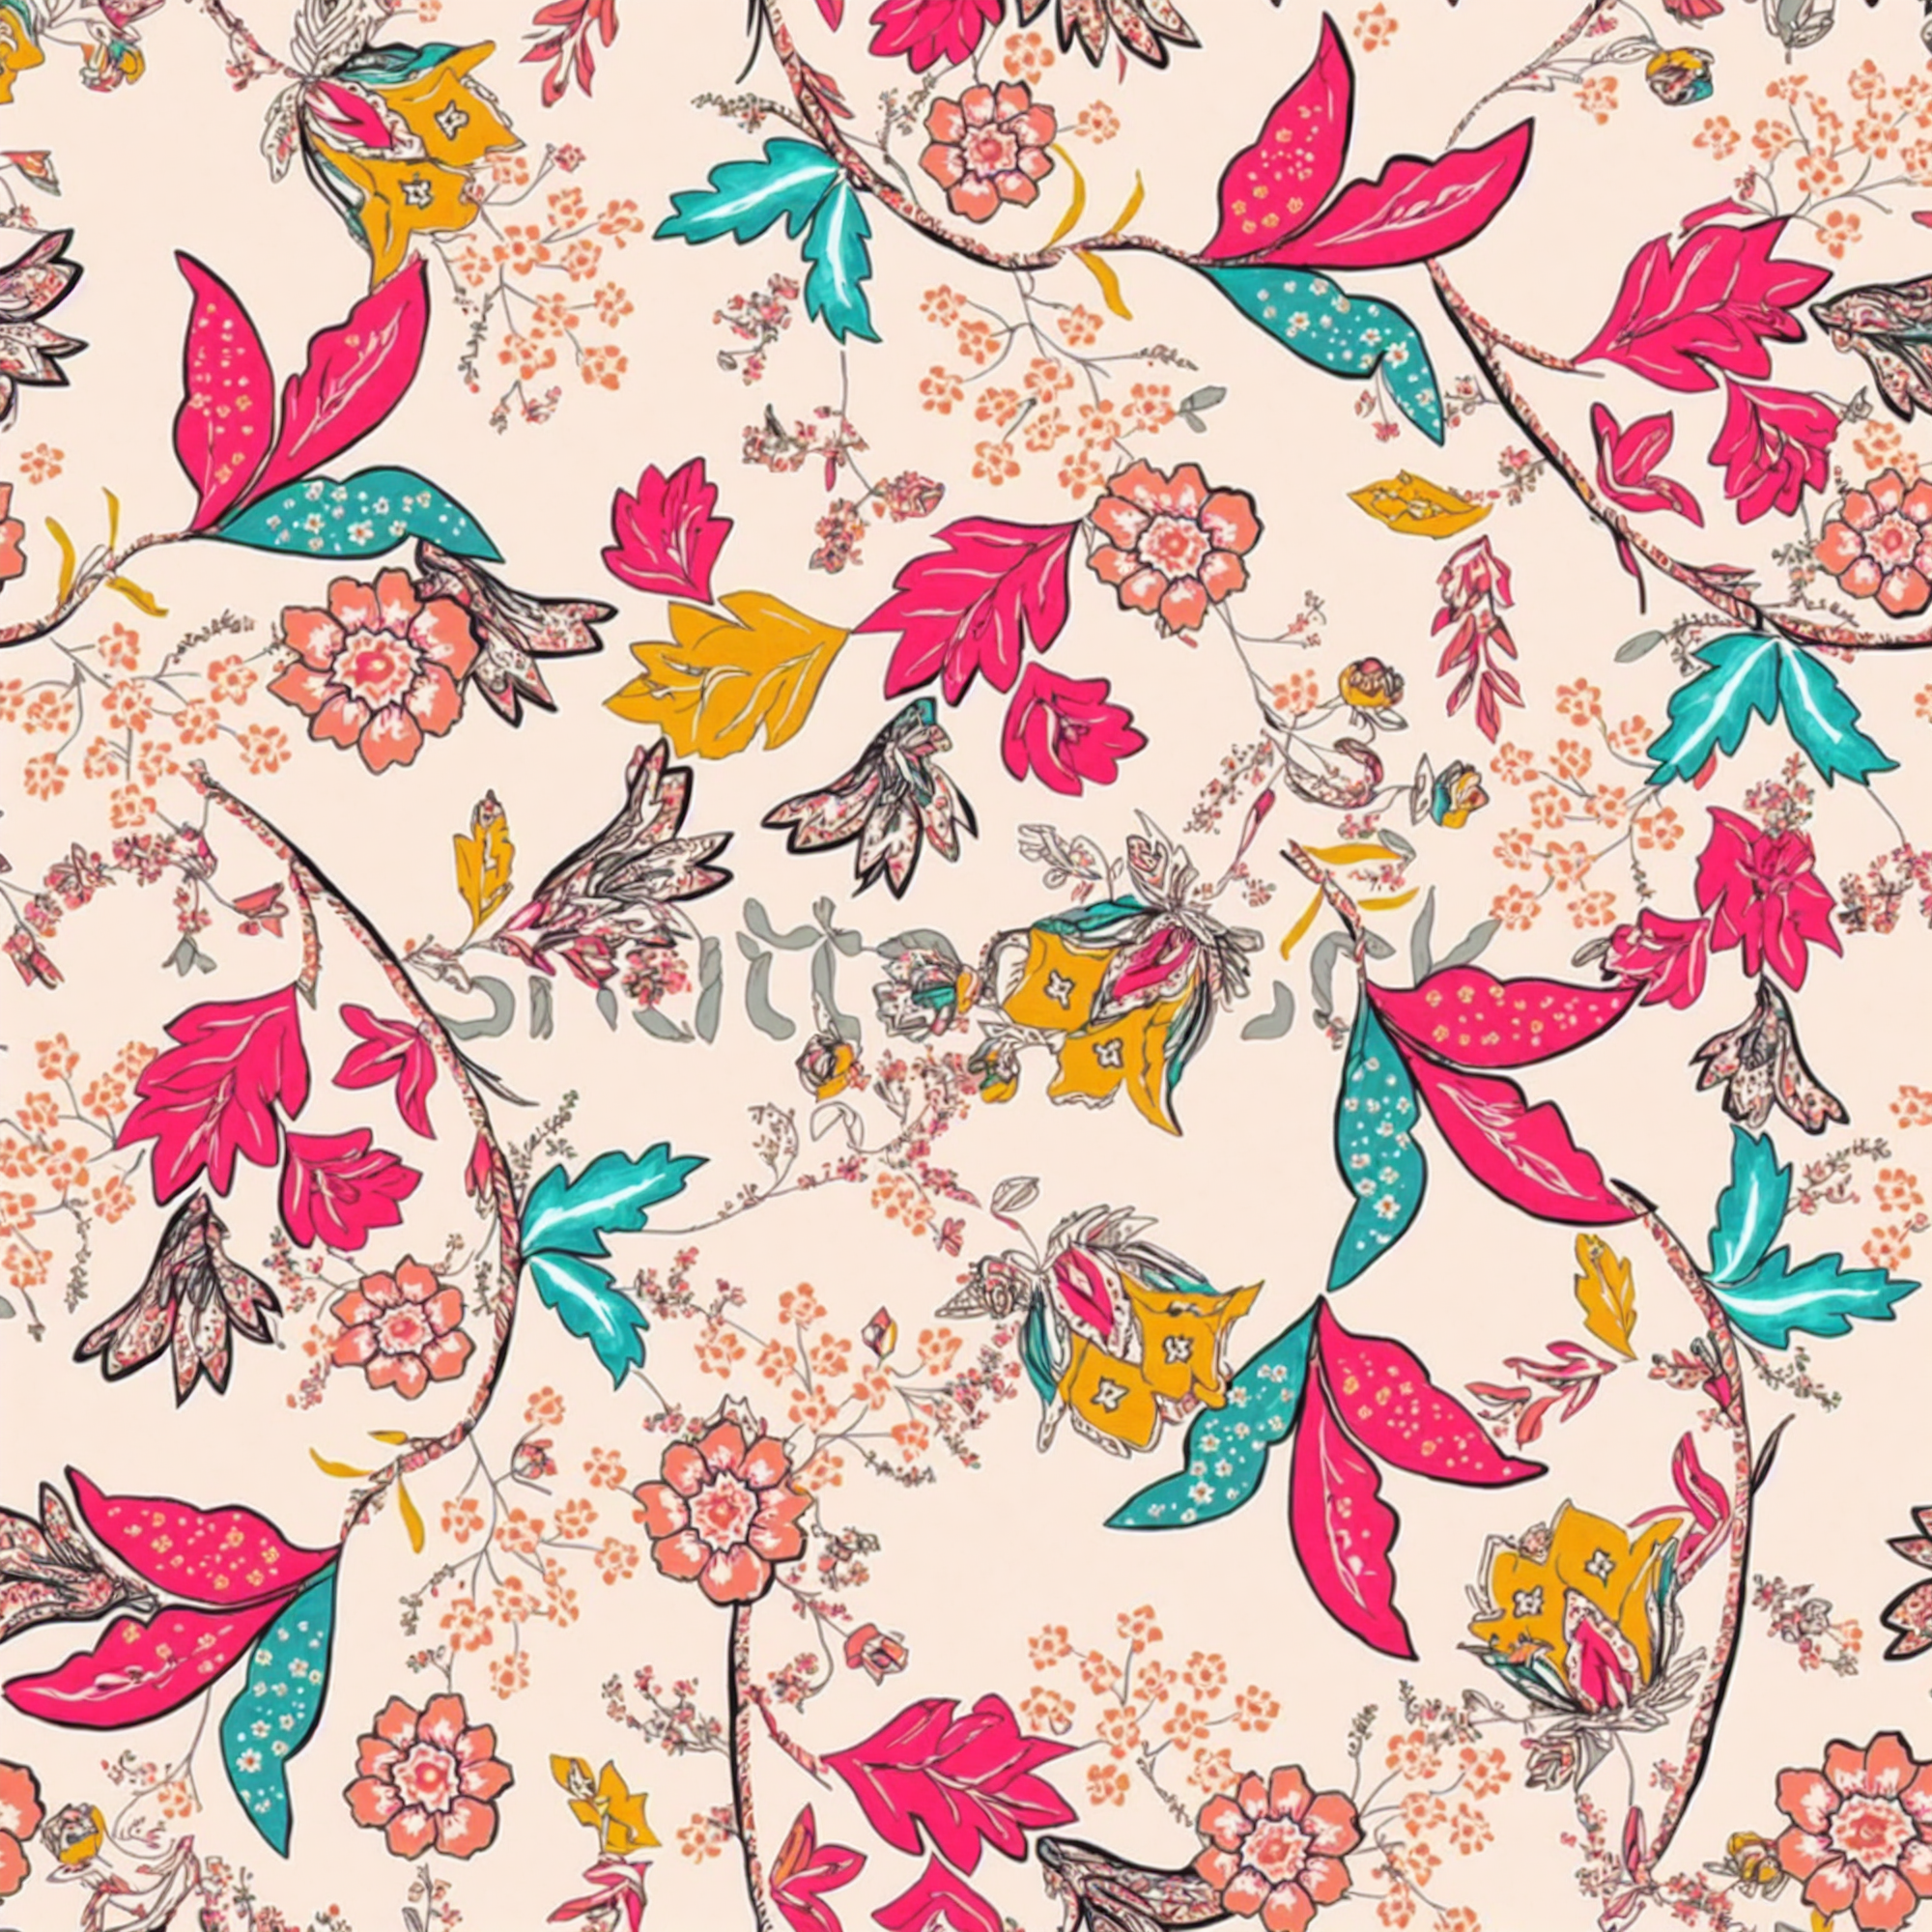

In [3]:

from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

prompt = "(insanely detailed, illustration, masterpiece, top quality, best quality, official art, beautiful and aesthetic:1.2) a pattern of flowers on black background"
init_image = init_image.resize((2000, 2000), Image.LANCZOS)
image = pipe(prompt=prompt, image=init_image, strength=0.35, guidance_scale=19, num_inference_steps= 150,
             negative_prompt="(watermark:1.6), watermark, text, username "
             ).images[0]
image.save("out2.png")

display(Image.open("out2.png").convert("RGB"))